In [1]:
# Python Libraries Project

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel("c:/users/THIS/Downloads/Financial_Sample.xlsx")
data.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


In [5]:
data.isnull().sum()

Segment                 8
Country                11
Product                 8
Discount Band          62
Units Sold              5
Manufacturing Price     0
Sale Price              7
Gross Sales             5
Discounts               5
 Sales                  0
COGS                    0
Profit                  0
Date                    0
Month Number            0
Month Name              0
Year                    0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              692 non-null    object        
 1   Country              689 non-null    object        
 2   Product              692 non-null    object        
 3   Discount Band        638 non-null    object        
 4   Units Sold           695 non-null    float64       
 5   Manufacturing Price  700 non-null    int64         
 6   Sale Price           693 non-null    float64       
 7   Gross Sales          695 non-null    float64       
 8   Discounts            695 non-null    float64       
 9    Sales               700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

In [14]:
# Mising Data (We can lose this data if we remove)
data.isnull().sum().sum()/data.shape[0]*100

15.857142857142856

In [22]:
# Data Filling in Object DataTypes
for obj in data.select_dtypes(include="object").columns:
    data[obj] = data[obj].fillna(data[obj].mode()[0])

In [24]:
# Object Null Values Has Removed
data.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             5
Manufacturing Price    0
Sale Price             7
Gross Sales            5
Discounts              5
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [31]:
# Removing null values from float64 data types.
for flo in data.select_dtypes(include="float64").columns:
    data[flo] = data[flo].fillna(data[flo].mean())

In [33]:
# Float64 null Vlaues has removed
data.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [35]:
# Now, We have a cleaned Data
data.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,High,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,High,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,High,2178.0,3,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


In [40]:
# Creating A report on Profit by Segment
data["Segment"].unique()

array(['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business'], dtype=object)

In [41]:
segment = ['Government', 'Midmarket', 'Channel Partners', 'Enterprise',
       'Small Business']

In [61]:
profit = []

In [62]:
# Calculating Profit by Segments
for seg in segment:
    pro = 0
    for i in range(0,len(data["Profit"])):
        if(data["Segment"][i]==seg):
            pro=pro+data["Profit"][i]
    profit.append(pro)

In [65]:
profit

[11414168.049999984,
 660103.0749999998,
 1290808.2599999998,
 -614545.625,
 4143168.5]

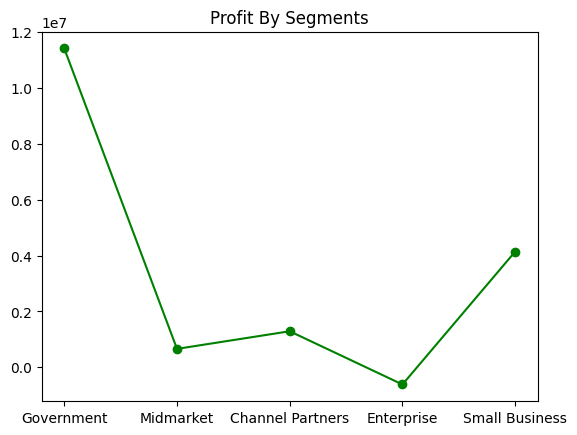

In [77]:
# A CHART ON PROFIT BY SEGMENTS
plt.plot(segment,profit,marker="o",color="green")
plt.title("Profit By Segments")
plt.show()

In [70]:
cogs = []

In [71]:
# Calculating COGS by Segments
for seg in segment:
    pro = 0
    for i in range(0,len(data["COGS"])):
        if(data["Segment"][i]==seg):
            pro=pro+data["COGS"][i]
    cogs.append(pro)

In [72]:
cogs

[41124913.5, 1721780.0, 474964.5, 20226240.0, 38284750.0]

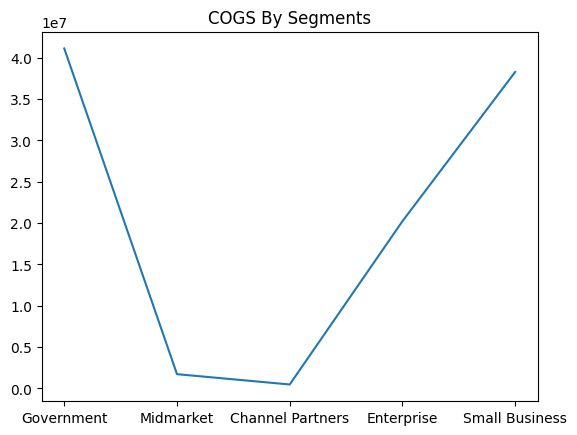

In [79]:
# A CHART ON COGS BY SEGMENTS
plt.plot(segment,cogs)
plt.title("COGS By Segments")
plt.show()

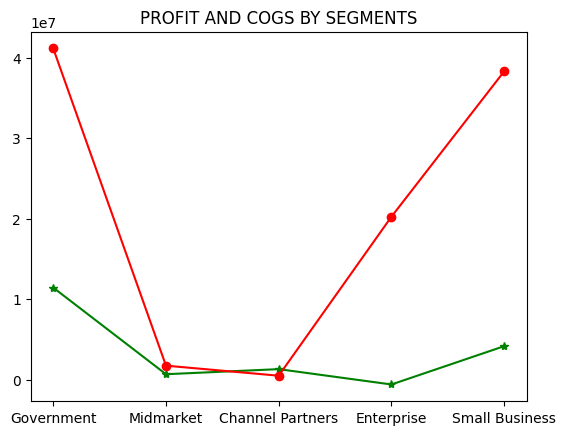

In [83]:
# PROFIT AND COGS By SEGMENTS
plt.plot(segment,profit,marker="*",color="green")
plt.plot(segment,cogs,marker="o",color="red")
plt.title("PROFIT AND COGS BY SEGMENTS")
plt.show()

In [91]:
# Profit and COGS
p = sum(profit)
c = sum(cogs)
netSale = p+c

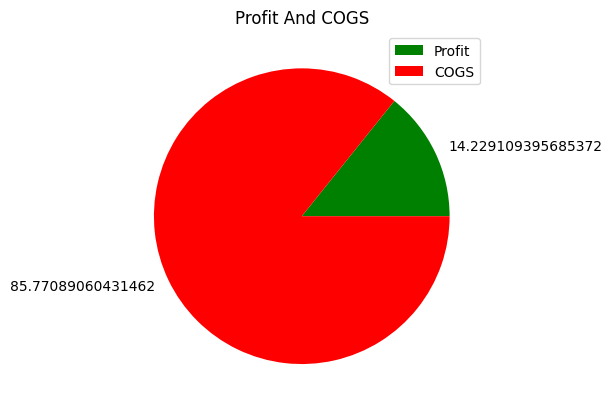

In [92]:
plt.pie([p,c],colors=["Green","Red"],labels=[p/netSale*100,c/netSale*100])
plt.title("Profit And COGS")
plt.legend(["Profit","COGS"])
plt.show()

In [93]:
data.head(3)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,High,1618.5,3,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,High,1321.0,3,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,High,2178.0,3,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014


In [95]:
data["Product"].unique()

array(['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla'],
      dtype=object)

In [96]:
product = ['Carretera', 'Montana', 'Paseo', 'Velo', 'VTT', 'Amarilla']

In [109]:
mp = []
sp = []

In [110]:
for pro in product:
    m = 0
    s = 0
    for i in range(0,len(data["Product"])):
        if(pro==data["Product"][i]):
            m=m+data["Manufacturing Price"][i]
            s=s+data["Sale Price"][i]
    mp.append(m)
    sp.append(s)

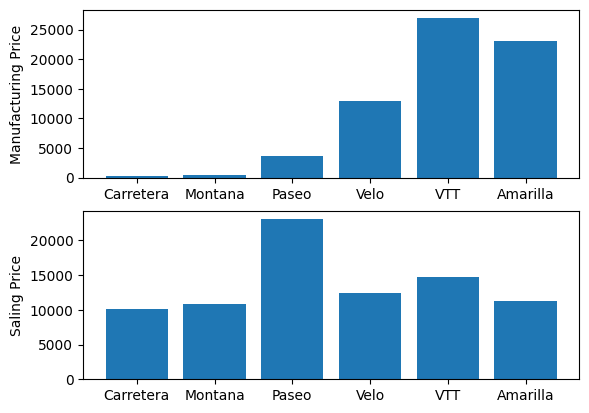

In [120]:
plt.subplot(2,1,1)
plt.bar(product,mp)
plt.ylabel("Manufacturing Price")
plt.subplot(2,1,2)
plt.bar(product,sp)
plt.ylabel("Saling Price")
plt.show()

In [121]:
manPr = sum(mp)
salPr = sum(sp)

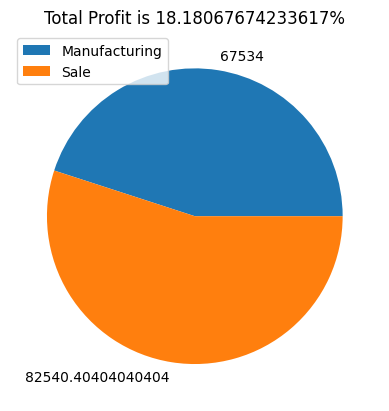

In [128]:
# Profit Percentage By Using Manufacturing and Sale Price
plt.pie([manPr,salPr],labels=[manPr,salPr])
pp = (salPr-manPr)/salPr*100
plt.title("Total Profit is "+str(pp)+"%")
plt.legend(["Manufacturing","Sale"])
plt.show()